## Libraries and basics

In [ ]:
#import libraries

#basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

#stats
import math, time, random, datetime

#visualizing missing values
import missingno as msno

#processing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#spliting and testing data
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn import metrics, model_selection, tree, preprocessing, linear_model
from sklearn.metrics import accuracy_score

#machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#colors to be used
PURPLE = '\033[95m'
CYAN = '\033[96m'
DARKCYAN = '\033[36m'
BLUE = '\033[94m'
GREEN = '\033[92m'
YELLOW = '\033[93m'
RED = '\033[91m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
END = '\033[0m'

df = pd.read_csv('data/housing_opt2.csv')

from ml import Model
data = Model(df,ycol='median_house_value',scaler='Standard')
x_train,x_test,y_train,y_test = data.return_data()

In [ ]:
#found on solution notebook

algo = SVR(C=157055.10989448498, gamma=0.26497040005002437,
           kernel= 'rbf')
model = algo.fit(x_train,y_train)

acc_train = model.score(x_train,y_train)
acc_test = model.score(x_test,y_test)
print("Accuracy Train: %s" % acc_train)
print("Accuracy Test: %s" % acc_test)

Accuracy Train: 0.8007961154759966
Accuracy Test: 0.7659463807014664


#### Comparison between feature engineerings
- Around 50% accuracy

In [ ]:
df = pd.read_csv('data/housing_opt1.csv')
df

from ml import Model

model = Model(df,ycol='median_income',scaler='Standard')

avr_model = model.apply_SVR(accs='all')

Accuracy Train: 49.42
Accuracy Test: 47.72
Accuracy CV 10-Fold: [0.50988298 0.45572691 0.29989728 0.52869811 0.47762385 0.431363
 0.39709441 0.16384388 0.39408996 0.51499983]


In [ ]:
df = pd.read_csv('data/housing_opt2.csv')
df

from ml import Model

model = Model(df,ycol='median_income',scaler='Standard')

avr_model = model.apply_SVR(accs='simple')

Accuracy Train: 49.51
Accuracy Test: 47.81


In [ ]:
df = pd.read_csv('data/housing_opt3.csv')
df

from ml import Model

model = Model(df,ycol='median_income',scaler='Standard')

avr_model = model.apply_SVR(accs='simple')

Accuracy Train: 49.4
Accuracy Test: 47.71


In [ ]:
df = pd.read_csv('data/housing_opt4.csv')
df

from ml import Model

model = Model(df,ycol='median_income',scaler='Standard')

avr_model = model.apply_SVR(accs='simple')

Accuracy Train: 49.48
Accuracy Test: 47.79


# Complete Model: Support Vector Machine

In [ ]:
df = pd.read_csv('data/housing_opt2.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR WATER
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


In [ ]:
from ml import Model
data = Model(df,ycol='median_house_value',scaler='Standard')
x_train,x_test,y_train,y_test = data.return_data()

In [ ]:
?SVR

Init signature:
SVR(
    *,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)
Docstring:     
Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to datasets with more than a couple of 10000 samples. For large
datasets consider using :class:`~sklearn.svm.LinearSVR` or
:class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

Read more in the :ref:`User Guide <svm_regression>`.

Parameters
----------
kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
     Specifies the kernel type to be used in the algorithm.
     It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed

#### Hyperparameter tuning: GridSearch
- Around 60% accuracy

In [ ]:
?GridSearchCV

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object.
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list o

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
    'kernel': ['poly','rbf','sigmoid'],
    'C': [0.1,1,10],
    'gamma': [0.01,0.1,1]
    },
    {
    'kernel': ['linear'],
    'C': [10,100,1000]
    },
]

algo = SVR(max_iter=10000)

search = GridSearchCV(estimator=algo,
                     param_grid=param_grid,cv=2,
                     scoring='neg_mean_squared_error',
                     return_train_score=True,verbose=2)
search.fit(x_train,y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   3.8s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   3.8s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   5.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   6.2s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   7.7s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   7.8s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   3.7s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   3.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   6.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   5.9s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   8.9s
[CV] END ...................C=0.1, gamma=0.1, ke

GridSearchCV(cv=2, estimator=SVR(max_iter=10000),
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                          'kernel': ['poly', 'rbf', 'sigmoid']},
                         {'C': [10, 100, 1000], 'kernel': ['linear']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [ ]:
print(-search.best_score_)
print(search.best_params_)

5008386007.166459
{'C': 1000, 'kernel': 'linear'}


In [ ]:
algo = SVR(C=1000,kernel='linear')
model = algo.fit(x_train,y_train)
acc_train = model.score(x_train,y_train)
acc_test = model.score(x_test,y_test)
print("Accuracy Train: %s" % acc_train)
print("Accuracy Test: %s" % acc_test)

Accuracy Train: 0.6275142725036174
Accuracy Test: 0.6008311206376373


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
    'kernel': ['linear'],
    'C': [3000,6000,10000,12500,15000,17500,20000]
    },
]

algo = SVR(max_iter=10000)

search = GridSearchCV(estimator=algo,
                     param_grid=param_grid,cv=2,
                     scoring='neg_mean_squared_error',
                     return_train_score=True,verbose=2)
search.fit(x_train,y_train)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV] END ..............................C=3000, kernel=linear; total time=   3.6s
[CV] END ..............................C=3000, kernel=linear; total time=   3.6s
[CV] END ..............................C=6000, kernel=linear; total time=   3.7s
[CV] END ..............................C=6000, kernel=linear; total time=   3.7s
[CV] END .............................C=10000, kernel=linear; total time=   3.8s
[CV] END .............................C=10000, kernel=linear; total time=   3.8s
[CV] END .............................C=12500, kernel=linear; total time=   3.8s
[CV] END .............................C=12500, kernel=linear; total time=   3.9s
[CV] END .............................C=15000, kernel=linear; total time=   4.0s
[CV] END .............................C=15000, kernel=linear; total time=   4.0s
[CV] END .............................C=17500, kernel=linear; total time=   4.0s
[CV] END .............................C=17500, ke

GridSearchCV(cv=2, estimator=SVR(max_iter=10000),
             param_grid=[{'C': [3000, 6000, 10000, 12500, 15000, 17500, 20000],
                          'kernel': ['linear']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [ ]:
print(-search.best_score_)
print(search.best_params_)

4963970267.311083
{'C': 10000, 'kernel': 'linear'}


In [ ]:
algo = SVR(C=10000,kernel='linear')
model = algo.fit(x_train,y_train)
acc_train = model.score(x_train,y_train)
acc_test = model.score(x_test,y_test)
print("Accuracy Train: %s" % acc_train)
print("Accuracy Test: %s" % acc_test)

Accuracy Train: 0.6287221721938374
Accuracy Test: 0.5983949618746047


#### Hyperparameter tuning: RandomizedSearchCV
- Around 80% accuracy

In [ ]:
?RandomizedSearchCV

Init signature:
RandomizedSearchCV(
    estimator,
    param_distributions,
    *,
    n_iter=10,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    random_state=None,
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Randomized search on hyper parameters.

RandomizedSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but
rather a fixed number of parameter settings is sampled from the specified
distributions. The number of parameter settings that are tried is
given by n_iter.

If all parameters are presented as a list,
sampling without replacement is p

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon,reciprocal

param_dist = {
    'kernel': ['linear','rbf'],
    'C': reciprocal(100,100000),
    'gamma':expon(scale=1.0),
    }

algo = SVR(max_iter=10000)
search = RandomizedSearchCV(estimator=algo,
                           param_distributions=param_dist,
                           n_iter=50,cv=2,
                           scoring='neg_mean_squared_error',
                           verbose=2)
search.fit(x_train,y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] END C=3054.5593265747007, gamma=1.2998117726172989, kernel=rbf; total time=   6.1s
[CV] END C=3054.5593265747007, gamma=1.2998117726172989, kernel=rbf; total time=   6.1s
[CV] END C=100.56736081816628, gamma=1.537112260798591, kernel=rbf; total time=   6.1s
[CV] END C=100.56736081816628, gamma=1.537112260798591, kernel=rbf; total time=   5.8s
[CV] END C=1169.4977743425577, gamma=5.338643436864871, kernel=rbf; total time=   7.6s
[CV] END C=1169.4977743425577, gamma=5.338643436864871, kernel=rbf; total time=   7.7s
[CV] END C=16584.418536729187, gamma=1.7959317863326765, kernel=linear; total time=   4.0s
[CV] END C=16584.418536729187, gamma=1.7959317863326765, kernel=linear; total time=   4.0s
[CV] END C=3518.1985194197077, gamma=1.0597343403037787, kernel=linear; total time=   3.6s
[CV] END C=3518.1985194197077, gamma=1.0597343403037787, kernel=linear; total time=   3.6s
[CV] END C=2822.367292411449, gamma=0.028625425713

RandomizedSearchCV(cv=2, estimator=SVR(max_iter=10000), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1870301730>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f18703012b0>,
                                        'kernel': ['linear', 'rbf']},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print(-search.best_score_)
print(search.best_params_)

3768753613.91717
{'C': 63787.8142248369, 'gamma': 1.0155610271452773, 'kernel': 'rbf'}


In [ ]:
algo = SVR(C=63787.8142248369,gamma=1.0155610271452773,
           kernel='rbf')
model = algo.fit(x_train,y_train)
acc_train = model.score(x_train,y_train)
acc_test = model.score(x_test,y_test)
print("Accuracy Train: %s" % acc_train)
print("Accuracy Test: %s" % acc_test)

Accuracy Train: 0.8166819196333613
Accuracy Test: 0.7469916404922596


In [ ]:
#cross validation
cv=10
cross_val = cross_val_score(model,x_train,y_train,cv=cv)
cross_val

array([0.7671563 , 0.74214522, 0.76335124, 0.74628767, 0.73544318,
       0.75858437, 0.78165902, 0.7593132 , 0.73174801, 0.73858273])

In [ ]:
print('Cross val accuracy: %s ' % cross_val.mean())
print('Cross val stdev: %s ' % cross_val.std())

Cross val accuracy: 0.7524270941249671 
Cross val stdev: 0.015255413640515162 


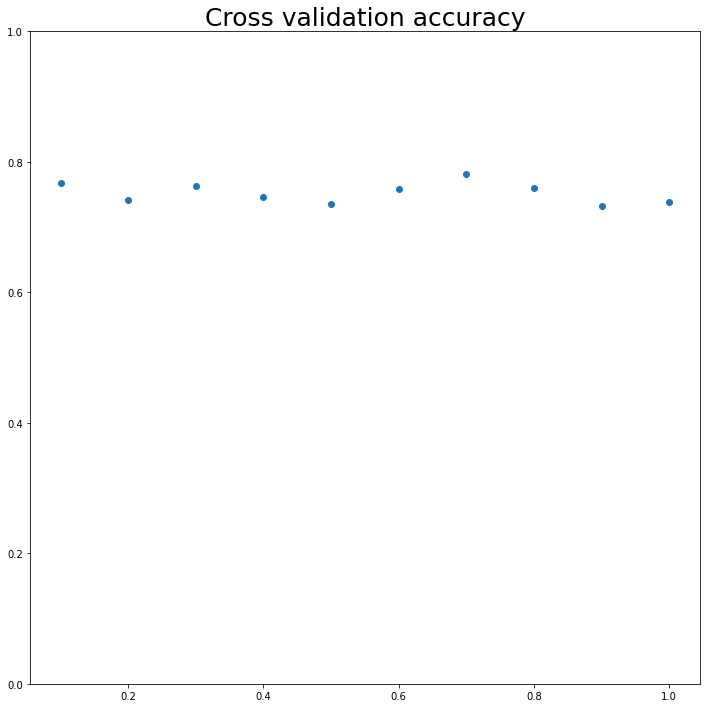

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(np.arange(0.1,1.1,0.1),cross_val)
plt.ylim(0,1)
plt.title('Cross validation accuracy',fontsize=25)
plt.show()

#### Hyperparameter tuning: Bayesian optimization
- Around 80% accuracy with less overfitting

In [ ]:
?SVC

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrati

In [ ]:
?fmin

Signature:
fmin(
    fn,
    space,
    algo,
    max_evals=9223372036854775807,
    timeout=None,
    loss_threshold=None,
    trials=None,
    rstate=None,
    allow_trials_fmin=True,
    pass_expr_memo_ctrl=None,
    catch_eval_exceptions=False,
    verbose=True,
    return_argmin=True,
    points_to_evaluate=None,
    max_queue_len=1,
    show_progressbar=True,
    early_stop_fn=None,
    trials_save_file='',
)
Docstring:
Minimize a function over a hyperparameter space.

More realistically: *explore* a function over a hyperparameter space
according to a given algorithm, allowing up to a certain number of
function evaluations.  As points are explored, they are accumulated in
`trials`


Parameters
----------

fn : callable (trial point -> loss)
    This function will be called with a value generated from `space`
    as the first and possibly only argument.  It can return either
    a scalar-valued loss, or a dictionary.  A returned dictionary must
    contain a 'status' key with a va

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

space = {'C': hp.uniform('C',100,100000),
        'kernel':hp.choice('kernel',['linear','rbf']),
        'gamma':hp.loguniform('gamma',0,1)
        }
def objective(space):

    algo = SVR(max_iter=10000,C=space['C'],kernel=space['kernel'],gamma=space['gamma'])
    accuracy = cross_val_score(algo,x_train,y_train,cv=5).mean()

    return {'loss':-accuracy, 'status': STATUS_OK}

best = fmin(fn=objective,space=space,algo=tpe.suggest,max_evals=5,trials=Trials())

best

100%|██████████| 5/5 [03:14<00:00, 38.93s/trial, best loss: -0.7053669714462746]


{'C': 79567.531640721, 'gamma': 2.00131184415237, 'kernel': 1}

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

space = {'C': hp.uniform('C',100,100000),
        'kernel':hp.choice('kernel',['linear','rbf']),
        'gamma':hp.lognormal('gamma',1,1)
        }
def objective(space):

    algo = SVR(max_iter=10000,C=space['C'],kernel=space['kernel'],gamma=space['gamma'])
    accuracy = cross_val_score(algo,x_train,y_train,cv=5).mean()

    return {'loss':-accuracy, 'status': STATUS_OK}

best = fmin(fn=objective,space=space,algo=tpe.suggest,max_evals=50,trials=Trials())

best

100%|██████████| 50/50 [40:06<00:00, 48.12s/trial, best loss: -0.7716199843049507]


{'C': 98444.24602802457, 'gamma': 0.33196206472681455, 'kernel': 1}

In [ ]:
algo = SVR(C=98444.24602802457, gamma=0.33196206472681455,
           kernel= 'rbf')
model = algo.fit(x_train,y_train)

acc_train = model.score(x_train,y_train)
acc_test = model.score(x_test,y_test)
print("Accuracy Train: %s" % acc_train)
print("Accuracy Test: %s" % acc_test)

Accuracy Train: 0.7999256499968933
Accuracy Test: 0.7645044334143164


In [ ]:
#cross validation
cv=10
cross_val = cross_val_score(model,x_train,y_train,cv=cv)
cross_val

array([0.7849077 , 0.7616826 , 0.78518518, 0.76402603, 0.76305538,
       0.78840109, 0.79493614, 0.77109326, 0.75888086, 0.75800354])

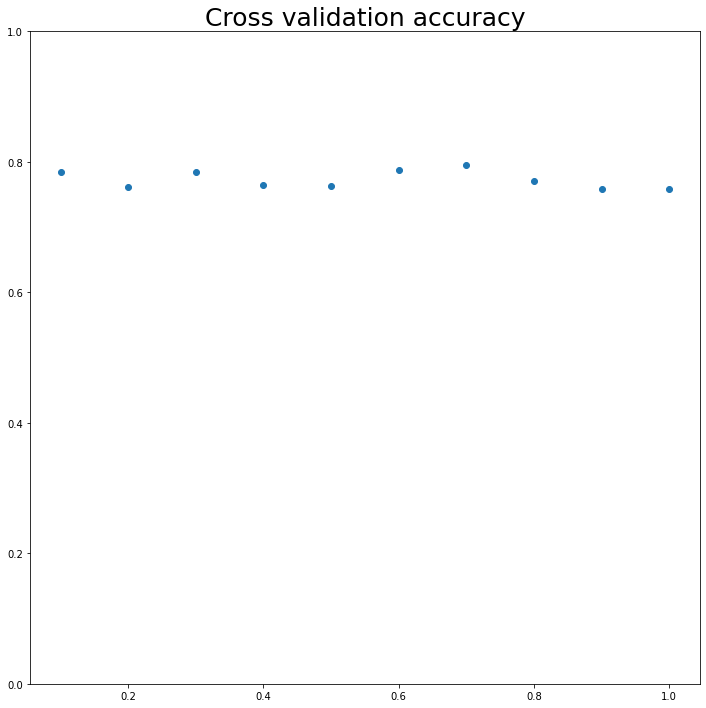

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(np.arange(0.1,1.1,0.1),cross_val)
plt.ylim(0,1)
plt.title('Cross validation accuracy',fontsize=25)
plt.show()

#### Hyperparameter tuning: Genetic Algorithm
- Above 80% accuracy but with a little overfiting

In [ ]:
from tpot import TPOTClassifier

parameters = {
    'max_iter':[10000],
    'C':np.linspace(100,100000,1000),
    'kernel':['rbf','linear'],
    'gamma':np.random.lognormal(1,1,1000)
}

tpot_classifier = TPOTClassifier(generations=5,population_size=12,offspring_size=6,
                                verbosity=2,early_stop=6,
                                config_dict={'sklearn.svm.SVR':parameters},
                                 cv=5,scoring='neg_mean_squared_error')
tpot_classifier.fit(x_train,y_train)

Optimization Progress:   0%|          | 0/42 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -3502260445.4278345

Generation 2 - Current best internal CV score: -3470268945.2336454

Generation 3 - Current best internal CV score: -3470268945.2336454

Generation 4 - Current best internal CV score: -3202547652.8204665

Generation 5 - Current best internal CV score: -3202547652.8204665

Best pipeline: SVR(input_matrix, C=96600.0, gamma=0.8560715796670523, kernel=rbf, max_iter=10000)


TPOTClassifier(config_dict={'sklearn.svm.SVR': {'C': array([   100.,    200.,    300.,    400.,    500.,    600.,    700.,
          800.,    900.,   1000.,   1100.,   1200.,   1300.,   1400.,
         1500.,   1600.,   1700.,   1800.,   1900.,   2000.,   2100.,
         2200.,   2300.,   2400.,   2500.,   2600.,   2700.,   2800.,
         2900.,   3000.,   3100.,   3200.,   3300.,   3400.,   3500.,
         3600.,   3700.,   3800.,   3900.,   4000.,   4100.,   4200.,
         4300.,   4400.,   4500.,   4600.,   4700.,   4800.,   4900.,
         5000.,   5...
       39.75909308,  6.82513372,  3.9507823 ,  1.68514599,  1.1611246 ,
        1.22115512,  4.6217374 ,  6.00995042,  4.01530685,  3.24984483,
        2.84451816,  4.60322   ,  0.53931696,  7.59399559, 17.41047082,
        4.86205669,  1.30330474,  1.88900995,  4.75192932,  2.15037151]),
                                                'kernel': ['rbf', 'linear'],
                                                'max_iter': [10000]

In [ ]:
algo = SVR(C=96600.0, gamma=0.8560715796670523,
           kernel= 'rbf')
model = algo.fit(x_train,y_train)

acc_train = model.score(x_train,y_train)
acc_test = model.score(x_test,y_test)
print("Accuracy Train: %s" % acc_train)
print("Accuracy Test: %s" % acc_test)

Accuracy Train: 0.8279207513609628
Accuracy Test: 0.7580576091294122


#### Hyperparameter optimization: Optuna

In [ ]:
?SVC

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrati

In [ ]:
import optuna

def objective(trial):

    params = {
        'C' : trial.suggest_uniform('C',1e2,1e5),
        'kernel' : trial.suggest_categorical('kernel',['linear','rbf']),
        'gamma' : trial.suggest_loguniform('gamma',1e-2,10)
    }

    model = SVR(**params,max_iter=1e4)
    model.fit(x_train,y_train)

    return cross_val_score(model,x_train,y_train,cv=5).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2021-02-21 18:50:22,011] A new study created in memory with name: no-name-02e5b866-ba74-41fc-b1ef-99ccaf3da796
[I 2021-02-21 18:51:19,304] Trial 0 finished with value: 0.7022894699456583 and parameters: {'C': 15564.442233245914, 'kernel': 'rbf', 'gamma': 0.04041404641101669}. Best is trial 0 with value: 0.7022894699456583.
[I 2021-02-21 18:52:03,711] Trial 1 finished with value: 0.6221912931747645 and parameters: {'C': 16244.623283269073, 'kernel': 'linear', 'gamma': 0.17426567000036886}. Best is trial 0 with value: 0.7022894699456583.
[I 2021-02-21 18:53:02,664] Trial 2 finished with value: 0.5967769338853077 and parameters: {'C': 1600.9413341443908, 'kernel': 'rbf', 'gamma': 0.23530985160468734}. Best is trial 0 with value: 0.7022894699456583.
[I 2021-02-21 18:53:47,133] Trial 3 finished with value: 0.6042452616207409 and parameters: {'C': 22358.92986036869, 'kernel': 'linear', 'gamma': 0.035248688985097414}. Best is trial 0 with value: 0.7022894699456583.
[I 2021-02-21 18:54:44,2

In [ ]:
params = {'C': 99448.59278046171, 'kernel': 'rbf', 'gamma': 0.34392791061008}
model = SVR(**params)
model.fit(x_train,y_train)

acc_train = model.score(x_train,y_train)
acc_test = model.score(x_test,y_test)
print("Accuracy Train: %s" % acc_train)
print("Accuracy Test: %s" % acc_test)

Accuracy Train: 0.8010583464610941
Accuracy Test: 0.7648248854107087


In [ ]:
#cross validation
cv=10
cross_val = cross_val_score(model,x_train,y_train,cv=cv)
cross_val

array([0.78516478, 0.7619253 , 0.78528563, 0.76412488, 0.76305053,
       0.7882468 , 0.79525997, 0.77121953, 0.75911128, 0.75833689])

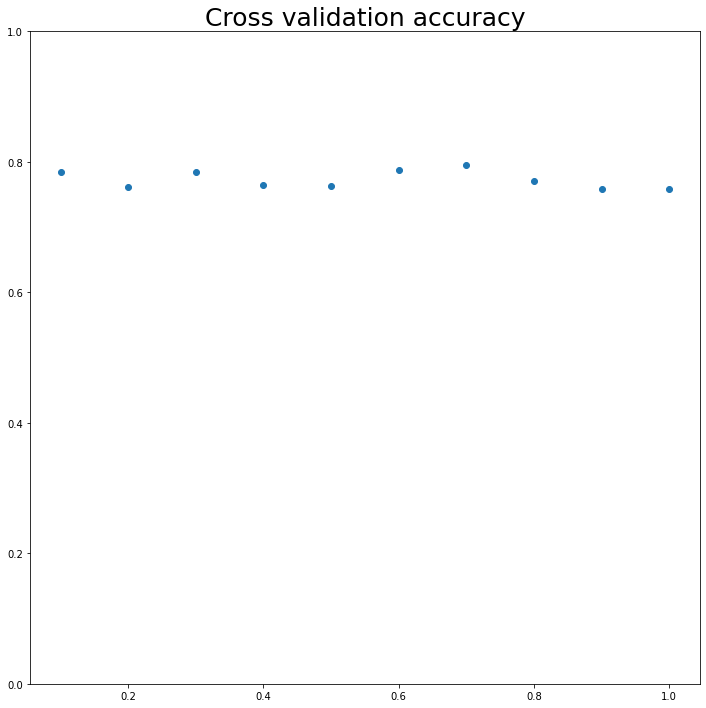

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(np.arange(0.1,1.1,0.1),cross_val)
plt.ylim(0,1)
plt.title('Cross validation accuracy',fontsize=25)
plt.show()

#### Save best model found and get predictions

In [ ]:
params = {'C': 99448.59278046171, 'kernel': 'rbf', 'gamma': 0.34392791061008}
model = SVR(**params)
model.fit(x_train,y_train)

acc_train = model.score(x_train,y_train)
acc_test = model.score(x_test,y_test)
print("Accuracy Train: %s" % acc_train)
print("Accuracy Test: %s" % acc_test)

Accuracy Train: 0.8010583464610941
Accuracy Test: 0.7648248854107087


In [ ]:
#save model
import pickle
pickle.dump(model,open('svr.pkl','wb'))